In [2]:
import pandas as pd
import numpy as np

In [75]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [76]:
df=pd.read_csv('file.csv')

In [77]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,11,29,0,0,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,0,1,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,9,25,1,9,8,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,0,0,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,0,0,0,0,0,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,0,0,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,0,0,0,0,0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1


In [78]:
df.shape

(51296, 79)

In [57]:
df['Approved_Flag'].value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

### Data Cleaning

In [20]:
for i in df.columns:
    count=(df[i]==-99999).sum()
    percentage=(count/len(df))*100
    if count > 0:
        print(f"Column: {i}, Count: {count}, Percentage: {percentage:.2f}%")

Column: time_since_recent_payment, Count: 4254, Percentage: 8.29%
Column: tot_enq, Count: 6306, Percentage: 12.29%
Column: CC_enq, Count: 6306, Percentage: 12.29%
Column: CC_enq_L6m, Count: 6306, Percentage: 12.29%
Column: CC_enq_L12m, Count: 6306, Percentage: 12.29%
Column: PL_enq, Count: 6306, Percentage: 12.29%
Column: PL_enq_L6m, Count: 6306, Percentage: 12.29%
Column: PL_enq_L12m, Count: 6306, Percentage: 12.29%
Column: time_since_recent_enq, Count: 6306, Percentage: 12.29%
Column: enq_L12m, Count: 6306, Percentage: 12.29%
Column: enq_L6m, Count: 6306, Percentage: 12.29%
Column: enq_L3m, Count: 6306, Percentage: 12.29%
Column: pct_currentBal_all_TL, Count: 70, Percentage: 0.14%


In [23]:
df.replace(-99999,np.nan,inplace=True)

In [27]:
df.dropna(inplace=True)

In [29]:
df.shape

(42064, 79)

### Separating Columns on the basis of datatytpe

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42064 entries, 0 to 51295
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          42064 no

In [30]:
categorical=[]
for i in df.columns:
    if (df[i].dtype=='object'):
        categorical.append(i)

In [31]:
categorical

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [33]:
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [37]:
(numeric_columns)

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [38]:
len(numeric_columns)

72

In [43]:
# Create DataFrames
df_numerical = df[numeric_columns]
df_categorical = df[categorical]

In [45]:
df_numerical.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
0,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.000,0,0,0,0,1,0,4,1,4,0,72,18,549.0,11,29,0,0,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6.0,0.0,0.0,0.0,6.0,0.0,0.0,566.0,0.0,0.0,0.0,48,51000,114,0.200,0.0,0.798,0,1,0.0,0.0,0.000,0.0,1,0,696
1,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.000,0,0,0,1,0,0,0,0,1,0,7,7,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,1.0,0.0,0.0,23,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.000,0.0,0,0,685
2,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.000,1,1,0,6,1,0,0,2,6,0,47,2,302.0,9,25,1,9,8,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,587.0,0.0,0.0,0.0,40,18,191,1.000,0.5,0.585,0,0,0.0,0.0,0.000,0.0,1,0,693
4,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.000,0,1,0,0,0,0,0,3,0,2,131,32,583.0,0,0,0,0,0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3951.0,0.0,0.0,0.0,48,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.000,0.0,0,0,753
5,6,5,1,0,0,0.000,0.0,0.167,0.833,0,1,0.00,0.167,0,4,0,0,2,0,0,6,0,0,150,17,245.0,14,270,0,0,0,13,11,5,0,2,3,0,1,0,0,0,0,0,0,26,15.0,2.0,0.0,1.0,7.0,3.0,3.0,7.0,6.0,5.0,4.0,35,0,154,0.167,0.0,0.000,0,0,1.0,0.0,0.429,0.0,1,0,668


In [46]:
df_categorical.head()

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,Married,12TH,M,PL,PL,P2
1,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,Married,SSC,M,ConsumerLoan,others,P2
4,Married,POST-GRADUATE,M,AL,AL,P1
5,Married,12TH,M,ConsumerLoan,PL,P3


## Univariate Analysis

In [79]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_TL,42064.0,5.262980,7.463383,1.0,1.000,3.000,6.000,235.0
Tot_Closed_TL,42064.0,2.967383,6.141098,0.0,0.000,1.000,3.000,216.0
Tot_Active_TL,42064.0,2.295597,2.404086,0.0,1.000,2.000,3.000,47.0
Total_TL_opened_L6M,42064.0,0.812643,1.383559,0.0,0.000,0.000,1.000,27.0
Tot_TL_closed_L6M,42064.0,0.489920,1.058920,0.0,0.000,0.000,1.000,19.0
pct_tl_open_L6M,42064.0,0.179032,0.278043,0.0,0.000,0.000,0.333,1.0
pct_tl_closed_L6M,42064.0,0.097783,0.210957,0.0,0.000,0.000,0.100,1.0
pct_active_tl,42064.0,0.577452,0.366110,0.0,0.286,0.545,1.000,1.0
pct_closed_tl,42064.0,0.422548,0.366110,0.0,0.000,0.455,0.714,1.0
Total_TL_opened_L12M,42064.0,1.672142,2.249543,0.0,0.000,1.000,2.000,34.0


In [53]:
df_numerical['Total_TL'].describe()

count    42064.000000
mean         5.262980
std          7.463383
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        235.000000
Name: Total_TL, dtype: float64

In [67]:
df_numerical['Total_TL'].skew()

np.float64(5.498357209788038)

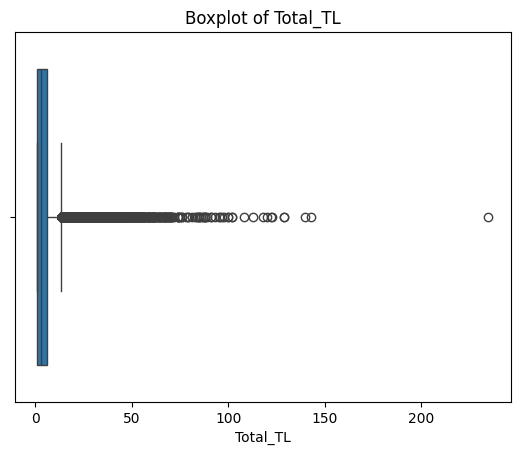

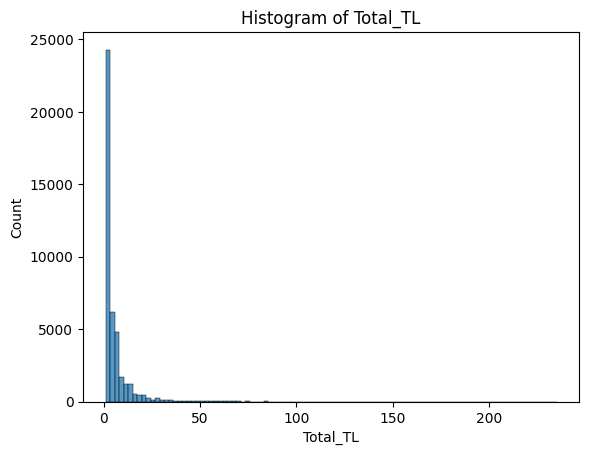

<Axes: ylabel='Density'>

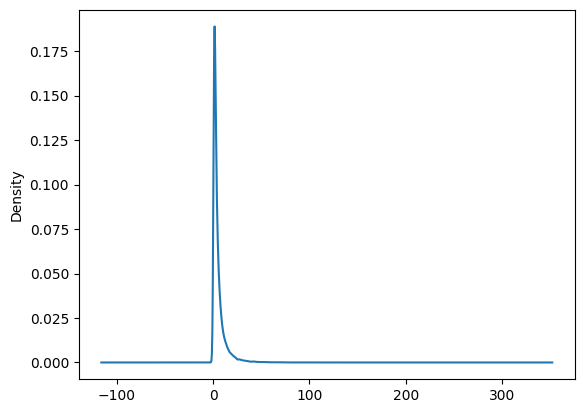

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_numerical['Total_TL'])
plt.title("Boxplot of Total_TL")
plt.show()

sns.histplot(df_numerical['Total_TL'], bins=100)
plt.title("Histogram of Total_TL")
plt.show()

df_numerical['Total_TL'].plot(kind='kde')

In [69]:
df_numerical[df_numerical['Total_TL']==235]

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
5257,235,216,19,0,0,0.0,0.0,0.081,0.919,0,2,0.0,0.009,0,0,0,0,235,0,0,235,0,0,36,18,296.0,63,76,0,0,0,51,33,0,0,0,0,0,0,0,0,0,0,0,0,64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,21,25000,38,0.081,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1,0,656


### Conclusion

**Risk Perspective:**
- A high Total_TL could mean the customer is financially active, or potentially over-leveraged.

- Very high values (e.g., 235) might indicate a risk, error in data, or a special business client.

**Modeling Use:**

   - Might be a good feature for classification, e.g., predicting if a customer is likely to default or not

In [58]:
df_numerical['Tot_Closed_TL'].describe()

count    42064.000000
mean         2.967383
std          6.141098
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        216.000000
Name: Tot_Closed_TL, dtype: float64

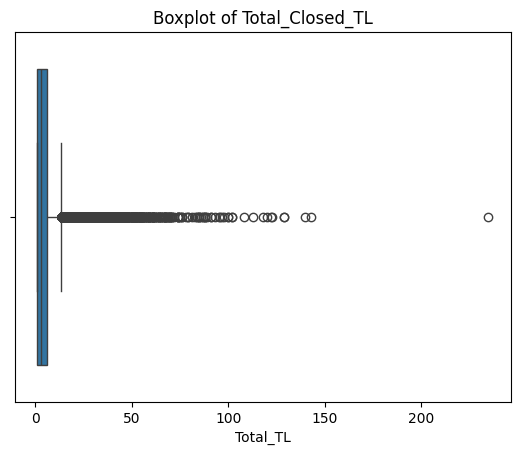

In [59]:
sns.boxplot(x=df_numerical['Total_TL'])
plt.title("Boxplot of Total_Closed_TL")
plt.show()

In [63]:
df_numerical['Tot_Active_TL'].describe()

count    42064.000000
mean         2.295597
std          2.404086
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         47.000000
Name: Tot_Active_TL, dtype: float64

In [64]:
df_numerical[df_numerical['Tot_Active_TL']==47]

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
10327,96,49,47,0,3,0.0,0.031,0.49,0.51,13,9,0.135,0.094,11,14,0,1,0,0,1,93,3,80,149,10,43.0,33,61,5,8,3,17,14,314,32,91,0,0,0,0,0,0,0,0,0,61,176.0,2.0,1.0,2.0,1.0,0.0,0.0,30.0,19.0,8.0,5.0,39,50000,120,0.49,0.0,0.684,0,1,0.0,0.5,0.0,0.5,0,0,767


<Axes: ylabel='count'>

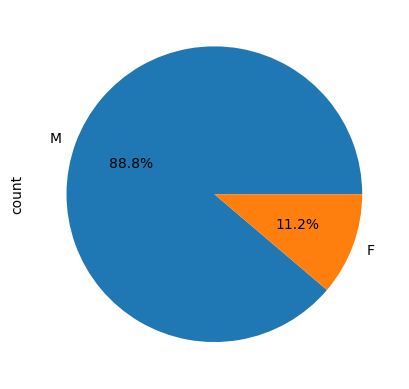

In [73]:
df_categorical['GENDER'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

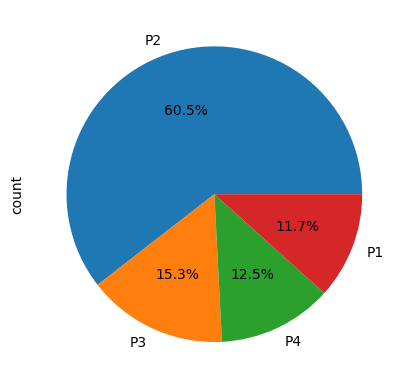

In [74]:
df_categorical['Approved_Flag'].value_counts().plot(kind='pie',autopct='%0.1f%%')


## Bivariate Analysis

**categorical-categorical**

In [101]:
df_categorical['MARITALSTATUS'].value_counts()

MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64

In [80]:
pd.crosstab(df_categorical['MARITALSTATUS'],df_categorical['Approved_Flag'])

Approved_Flag,P1,P2,P3,P4
MARITALSTATUS,,,,
Married,4435,18718,4387,3346
Single,473,6734,2053,1918


In [81]:
pd.crosstab(df_categorical['EDUCATION'],df_categorical['Approved_Flag'])

Approved_Flag,P1,P2,P3,P4
EDUCATION,,,,
12TH,1191,7326,1881,1305
GRADUATE,1766,8266,2136,1972
OTHERS,310,1401,327,253
POST-GRADUATE,304,1114,251,229
PROFESSIONAL,44,130,31,14
SSC,761,4518,1104,858
UNDER GRADUATE,532,2697,710,633


In [82]:
pd.crosstab(df_categorical['EDUCATION'],df_categorical['Approved_Flag'],normalize='columns')*100

Approved_Flag,P1,P2,P3,P4
EDUCATION,,,,
12TH,24.266504,28.783593,29.208075,24.791033
GRADUATE,35.982070,32.476819,33.167702,37.462006
OTHERS,6.316218,5.504479,5.077640,4.806231
POST-GRADUATE,6.193969,4.376866,3.897516,4.350304
PROFESSIONAL,0.896496,0.510765,0.481366,0.265957
SSC,15.505297,17.751061,17.142857,16.299392
UNDER GRADUATE,10.839446,10.596417,11.024845,12.025076


<Axes: xlabel='Approved_Flag', ylabel='EDUCATION'>

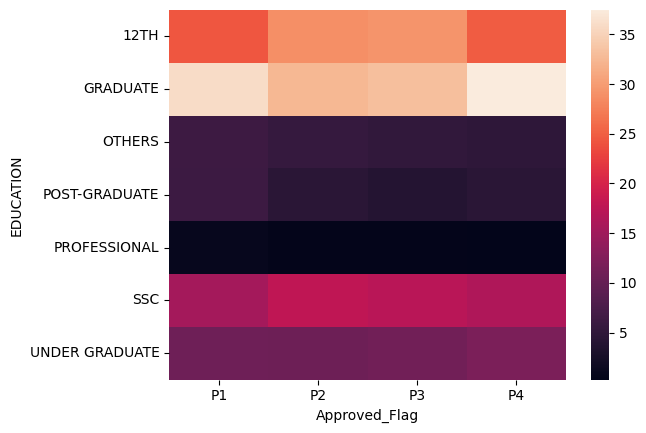

In [83]:
sns.heatmap(pd.crosstab(df_categorical['EDUCATION'],df_categorical['Approved_Flag'],normalize='columns')*100)

<Axes: xlabel='Approved_Flag', ylabel='NETMONTHLYINCOME'>

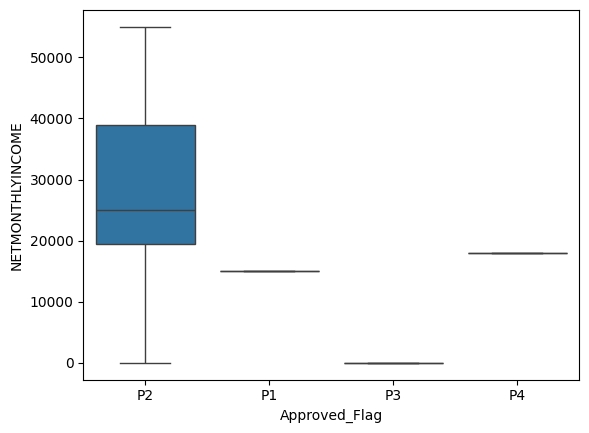

In [88]:
import seaborn as sns
sns.boxplot(x=df_categorical['Approved_Flag'].head(20), y=df_numerical['NETMONTHLYINCOME'].head(10))

## Multivariate Analysis

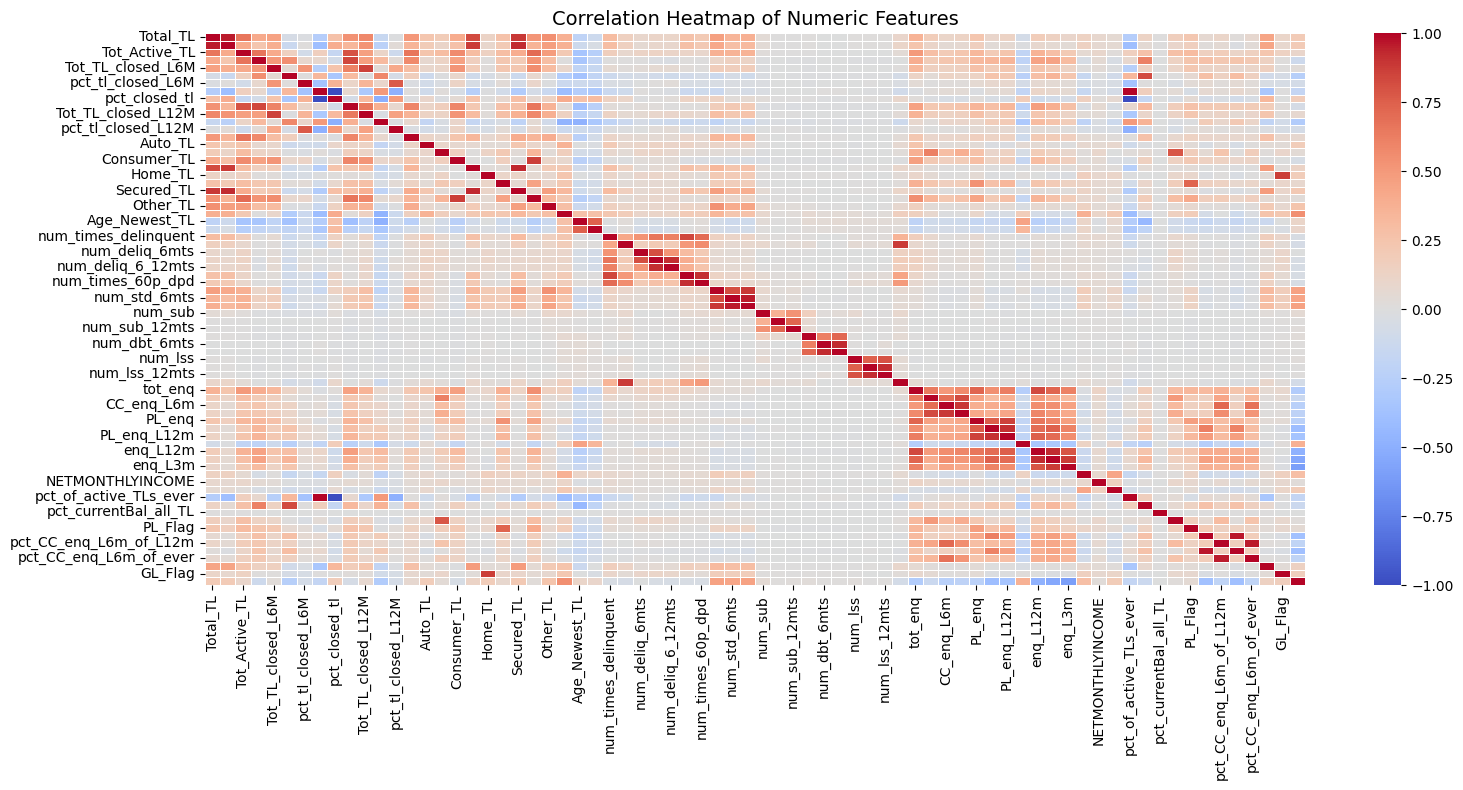

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix of numeric columns
corr_matrix = df_numerical.select_dtypes(include=['number']).corr()

# Plot heatmap of top 15 features most correlated with 'Approved_Flag' (if numeric)
# Note: 'Approved_Flag' is object type, so we'll skip direct correlation and show full heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

In [92]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Compute correlation matrix
corr_matrix = df_numerical.corr().abs()

# Step 2: Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Step 3: Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Step 4: Drop those columns
df_reduced = df_numerical.drop(columns=to_drop)

print("Dropped columns due to high correlation:")
print(to_drop)


Dropped columns due to high correlation:
['Tot_Closed_TL', 'pct_closed_tl', 'Tot_TL_closed_L12M', 'Gold_TL', 'Secured_TL', 'Unsecured_TL', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_dbt_12mts', 'num_lss_12mts', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'enq_L6m', 'enq_L3m', 'pct_of_active_TLs_ever', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'GL_Flag']


In [93]:
len(to_drop)

20